In [1]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np
import pandas as pd

# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy
from scipy import optimize
from scipy.optimize import minimize
# modulo para cargar archivos en formato MATLAB
# from scipy.io import loadmat

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

# Carga de datos
data = pd.read_csv("/content/drive/MyDrive/laboratorios_IA/examen de laboratorio/MushroomDataset/secondary_data.csv")


In [4]:
# Dividir la columna en múltiples columnas
data_split = data.iloc[:, 0].str.split(";", expand=True)


In [5]:
# Añadir nombres de columnas
data_split.columns = ["class", "cap-diameter", "cap-shape", "cap-surface", "cap-color", "does-bruise-or-bleed",
                      "gill-attachment", "gill-spacing", "gill-color", "stem-height", "stem-width", "stem-root",
                      "stem-surface", "stem-color", "veil-type", "veil-color", "has-ring", "ring-type",
                      "spore-print-color", "habitat", "season"]


In [6]:
data.info()
print(data)
#ojo la variable del data set es ahora  data_split  es el dataset separado en columnas nuevas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                             --------------  ----- 
 0   class;cap-diameter;cap-shape;cap-surface;cap-color;does-bruise-or-bleed;gill-attachment;gill-spacing;gill-color;stem-height;stem-width;stem-root;stem-surface;stem-color;veil-type;veil-color;has-ring;ring-type;spore-print-color;habitat;season  61069 non-null  object
dtypes: object(1)
memory usage: 477.2+ KB
      class;cap-diameter;cap-shape;ca

In [7]:
data_split.info()
print(data_split)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   class                 61069 non-null  object
 1   cap-diameter          61069 non-null  object
 2   cap-shape             61069 non-null  object
 3   cap-surface           61069 non-null  object
 4   cap-color             61069 non-null  object
 5   does-bruise-or-bleed  61069 non-null  object
 6   gill-attachment       61069 non-null  object
 7   gill-spacing          61069 non-null  object
 8   gill-color            61069 non-null  object
 9   stem-height           61069 non-null  object
 10  stem-width            61069 non-null  object
 11  stem-root             61069 non-null  object
 12  stem-surface          61069 non-null  object
 13  stem-color            61069 non-null  object
 14  veil-type             61069 non-null  object
 15  veil-color            61069 non-null

In [8]:
# Mostrar la distribución de valores únicos en cada columna
for col in data_split.columns:
    print(col)
    print(data_split[col].value_counts())
    print()


class
class
p    33888
e    27181
Name: count, dtype: int64

cap-diameter
cap-diameter
3.18     103
3.14      98
3.13      96
3.85      95
3.25      95
        ... 
51.39      1
47.85      1
50.18      1
45.67      1
20.42      1
Name: count, Length: 2571, dtype: int64

cap-shape
cap-shape
x    26934
f    13404
s     7164
b     5694
o     3460
p     2598
c     1815
Name: count, dtype: int64

cap-surface
cap-surface
     14120
t     8196
s     7608
y     6341
h     4974
g     4724
d     4432
e     2584
k     2303
i     2225
w     2150
l     1412
Name: count, dtype: int64

cap-color
cap-color
n    24218
y     8543
w     7666
g     4420
e     4035
o     3656
r     1782
u     1709
p     1703
k     1279
b     1230
l      828
Name: count, dtype: int64

does-bruise-or-bleed
does-bruise-or-bleed
f    50479
t    10590
Name: count, dtype: int64

gill-attachment
gill-attachment
a    12698
d    10247
      9884
x     7413
p     6001
e     5648
s     5648
f     3530
Name: count, dtype: int64

gill-

In [9]:
# Codificación de variables categóricas usando data_split
data_encoded = pd.get_dummies(data_split, drop_first=True)

# Mostrar las primeras filas del conjunto de datos codificado
print(data_encoded.head())


   class_p  cap-diameter_0.44  cap-diameter_0.47  cap-diameter_0.48  \
0     True              False              False              False   
1     True              False              False              False   
2     True              False              False              False   
3     True              False              False              False   
4     True              False              False              False   

   cap-diameter_0.49  cap-diameter_0.5  cap-diameter_0.51  cap-diameter_0.52  \
0              False             False              False              False   
1              False             False              False              False   
2              False             False              False              False   
3              False             False              False              False   
4              False             False              False              False   

   cap-diameter_0.53  cap-diameter_0.54  ...  habitat_g  habitat_h  habitat_l  \
0          

In [10]:
# Inicialización de parámetros
def initialize_parameters(dim):
    """
    Inicializa los parámetros del modelo (coeficientes y sesgo) a cero.

    Argumentos:
    dim -- tamaño del vector de características

    Retorna:
    w -- vector de coeficientes de tamaño (dim, 1)
    b -- término de sesgo, un escalar
    """
    w = np.zeros((dim, 1))
    b = 0
    return w, b

# Ejemplo de inicialización de parámetros
dim = data_split.shape[1]
w, b = initialize_parameters(dim)
print("Coeficientes (w):", w)
print("Término de sesgo (b):", b)


Coeficientes (w): [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Término de sesgo (b): 0


In [11]:
# Definición de la función sigmoide
def sigmoid(z):
    """
    Calcula la función sigmoide de z.

    Argumentos:
    z -- un escalar o un arreglo numpy de cualquier tamaño

    Retorna:
    s -- la sigmoide de z
    """
    s = 1 / (1 + np.exp(-z))
    return s

# Ejemplo de uso de la función sigmoide
z = np.array([0, 2, -2])
print("Sigmoide de z:", sigmoid(z))


Sigmoide de z: [0.5        0.88079708 0.11920292]


In [12]:
z = 0
print(sigmoid(z))  # Output: 0.5

z = 5
print(sigmoid(z))  # Output: 0.9933071490757153

z = -5
print(sigmoid(z))  # Output: 0.0066928509242848554


0.5
0.9933071490757153
0.0066928509242848554


In [13]:
# Verificar si hay valores faltantes en el conjunto de datos
missing_values = data_split.isnull().sum()
print("Valores faltantes por columna:\n", missing_values)


Valores faltantes por columna:
 class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64


In [14]:
def binary_cross_entropy_loss(y_true, y_pred):
    """
    Calcula la entropía cruzada binaria (binary cross-entropy loss).

    Argumentos:
    y_true -- etiquetas reales, un arreglo numpy de tamaño (m, 1)
    y_pred -- predicciones del modelo, un arreglo numpy de tamaño (m, 1)

    Retorna:
    loss -- el valor de la función de pérdida
    """
    m = len(y_true)
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss


In [15]:
def optimize_parameters(X, y, w, b, learning_rate, num_iterations):
    """
    Optimiza los parámetros utilizando el descenso de gradiente.

    Argumentos:
    X -- matriz de características de tamaño (m, n), donde m es el número de ejemplos y n es el número de características
    y -- etiquetas reales, un arreglo numpy de tamaño (m, 1)
    w -- vector de coeficientes de tamaño (n, 1)
    b -- término de sesgo, un escalar
    learning_rate -- tasa de aprendizaje para el descenso de gradiente
    num_iterations -- número de iteraciones del descenso de gradiente

    Retorna:
    w_opt -- coeficientes optimizados
    b_opt -- término de sesgo optimizado
    costs -- lista de valores de la función de pérdida en cada iteración
    """
    costs = []
    m = len(y)

    for i in range(num_iterations):
        # Paso 2: Calcular las predicciones del modelo
        y_pred = sigmoid(np.dot(X, w) + b)

        # Paso 3: Calcular el gradiente de la función de pérdida
        dw = np.dot(X.T, (y_pred - y)) / m
        db = np.mean(y_pred - y)

        # Paso 4: Actualizar los parámetros utilizando el gradiente descendente
        w -= learning_rate * dw
        b -= learning_rate * db

        # Calcular y almacenar el valor de la función de pérdida
        loss = binary_cross_entropy_loss(y, y_pred)
        costs.append(loss)

        # Mostrar el valor de la función de pérdida cada 100 iteraciones
        if i % 100 == 0:
            print(f"Iteración {i}: Pérdida = {loss}")

    return w, b, costs


Iteración 0: Pérdida = 0.6931471805599453
Iteración 100: Pérdida = 0.28427875825499127
Iteración 200: Pérdida = 0.16688717434684347
Iteración 300: Pérdida = 0.11616222678977949
Iteración 400: Pérdida = 0.08857602339959095
Iteración 500: Pérdida = 0.07140276897369885
Iteración 600: Pérdida = 0.059735912560196
Iteración 700: Pérdida = 0.051313693283838786
Iteración 800: Pérdida = 0.04495698069284441
Iteración 900: Pérdida = 0.039993421598844156
Coeficientes optimizados: [[-4.06540009e-05]
 [-6.07349585e-05]
 [-3.48799355e-05]
 ...
 [-5.44807114e-02]
 [-3.65373645e-01]
 [-9.81575482e-02]]
Término de sesgo optimizado: -1.0897502222449265


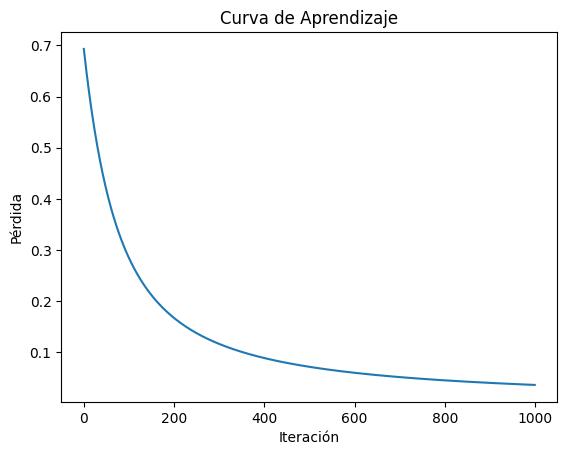

In [17]:
# Paso 1: Preparar los datos
X = data_encoded.drop(columns=['class_p']).values  # Características
y = (data_encoded['class_p'] == 'p').astype(int).values.reshape(-1, 1)  # Etiquetas (0 o 1)

# Paso 2: Inicializar los parámetros
dim = X.shape[1]
w_initial, b_initial = initialize_parameters(dim)

# Paso 3: Especificar la tasa de aprendizaje y el número de iteraciones
learning_rate = 0.01
num_iterations = 1000

# Paso 4: Optimizar los parámetros
w_opt, b_opt, costs = optimize_parameters(X, y, w_initial, b_initial, learning_rate, num_iterations)

# Paso 5: Obtener los parámetros optimizados y la lista de valores de pérdida
print("Coeficientes optimizados:", w_opt)
print("Término de sesgo optimizado:", b_opt)

# Paso 6: Visualizar la curva de aprendizaje
pyplot.plot(costs)
pyplot.xlabel('Iteración')
pyplot.ylabel('Pérdida')
pyplot.title('Curva de Aprendizaje')
pyplot.show()


In [ ]:
print(data_encoded.head())


In [40]:
def predict(X, w, b):
    """
    Realiza predicciones utilizando el modelo de regresión logística entrenado.

    Argumentos:
    X -- matriz de características de tamaño (m, n), donde m es el número de ejemplos y n es el número de características
    w -- vector de coeficientes de tamaño (n, 1)
    b -- término de sesgo, un escalar

    Retorna:
    predictions -- vector de predicciones binarias (0 o 1) de tamaño (m, 1)
    """
    m = X.shape[0]
    predictions = np.zeros((m, 1))

    # Calcula las probabilidades de clase 1 utilizando la función sigmoide
    probas = sigmoid(np.dot(X, w) + b)
    print(probas)

    # Clasifica como 1 si la probabilidad es mayor o igual a 0.5, de lo contrario, clasifica como 0
    predictions[probas >= 0.5] = 1

    return predictions

In [41]:
# Hacer predicciones en el conjunto de datos de prueba
X_test = data_encoded.drop(columns=['class_p']).values
y_pred = predict(X_test, w_opt, b_opt)

# Redondear las predicciones a 0 o 1 (comestible o venenoso)
y_pred_binary = np.round(y_pred)

# Mostrar las primeras predicciones
print(y_pred[:10])


[[0.03873204]
 [0.02992117]
 [0.03873779]
 ...
 [0.04291048]
 [0.03862911]
 [0.04292473]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
